## Performing sentimental analysis on the Elon-musk tweets

In [1]:
import pandas as pd
import numpy as np
import string
import spacy

In [2]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [9]:
tweets = pd.read_csv('Elon_musk.csv', encoding='unicode_escape')
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [10]:
tweets= tweets.rename({'Text':'x'},axis = 1)
##tweets

In [11]:
tweets.dtypes

Unnamed: 0     int64
x             object
dtype: object

In [12]:
tweets = [x.strip() for x in tweets.x] # remove both the leading and the trailing characters
tweets = [x for x in tweets if x] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [13]:
## Joining the list into one string
text = ' '.join(tweets)
#text

In [42]:
## Punctuation
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text[1:100]

'unalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it j'

In [15]:
## Tokenization

from nltk.tokenize import word_tokenize
text_tokens =  word_tokenize(no_punc_text)


In [16]:
len(text_tokens)

21078

In [19]:
## Remove stop words
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
my_stop_words = stopwords.words('english')
my_stop_words.append(["a's","able","about","according","accordingly",'across','actually','afterwards',"ain't",'allow','allows',
'almost','alone','along','already','also','although','always','among','amongst','another','anybody','anyhow','anyone','anything',
'anyway','anyways','anywhere','apart','appear','appreciate','appropriate','are','around','aside','ask','asking','associated',
'at','available','away','awfully','became','become','becomes','becoming','been','beforehand','behind','believe','beside',
'besides','best','better','between','beyond','brief','but',"c'mon","c's",'came','cannot','cant','cause','causes','certain','certainly',
'changes','clearly','co','com','come','comes','concerning','consequently','consider','considering','contain','containing',
'contains','corresponding','could','course','currently','definitely','described','despite','different','done','downwards','during',
'each','edu','eg','eight','either','else','elsewhere','enough','entirely','especially','et','etc','even','ever','every','everybody',
'everyon','everything','everywhere','ex','exactly','example','except','far','few','fifth','first','five','followed','following',
'follows','former','formerly','forth','four','further','furthermore','get','gets','getting','given','gives','go','goes','going',
'gone','got','gotten','greetings','happens','hardly',"he's",'hello','help','hence','here',"here's",'hereafter','hereby','herein',
'hereupon','hi','hither','hopefully','how','howbeit','however',"i'd","i'll","i'm","i've",'ie','ignored','immediate','inasmuch',
'inc','indeed','indicate','indicated','indicates','inner','insofar','instead','inward','it',"it'd","it'll","it's",'its','itself',
'keep','keeps','kept','know','knows','known','last','lately','later','latter','latterly','least','less','lest','let',"let's",'like',
'liked','likely','little','look','looking','looks','ltd','mainly','many','may','maybe','mean','meanwhile','merely','might','moreover',
'mostly','much','must','name','namely','nd','near','nearly','necessary','need','needs','neither','never','nevertheless','new','next',
'nine','no','nobody','non','none','noone','nor','normally','not','nothing','novel','now','nowhere','obviously','of','often','oh',
'ok','okay','old','once''one','ones','only','onto','other','others','otherwise','ought','ourselves','out','outside','over','overall',
'own','particular','particularly','per','perhaps','placed','please','plus','possible','presumably','probably','provides','que','quite',
'qv','rather','rd','re','really','reasonably','regarding','regardless','regards','relatively','respectively','right','said',
'saw','say','saying','says','second','secondly','see','seeing','seem','seemed','seeming','seems','seen','self','selves','sensible',
'sent','serious','seriously','seven','several','shall','since','six','somebody','somehow','someone','something','sometime','sometimes',
'somewhat','somewhere','soon','sorry','specified','specify','specifying','still','sub','sup','sure',
"t's",'take','taken','tell','tends','thank','thanks','thanx',"that's",'thats','the','go',
'then','thence',"there's",'thereafter','thereby','therefore','therein','theres','thereupon',"they'd","they'll","they're","they've",
'think','third','thorough','thoroughly','though','three','throughout','thru','thus','together','took','toward','towards','tried','tries','truly','try','trying','twice',
'two','un','unfortunately','unless','unlikely','unto','upon','us','use','used','useful','uses','using','usually','uucp',
'value','various','very','via','viz','vs','want','wants','way',"we'd","we'll","we're","we've",'welcome','well','went','were',
"what's",'whatever','whence','whenever',"where's",'whereafter','whereas','whereby','wherein','whereupon','wherever','whether','while',
'whither',"who's",'whoever','whole','whose','willing','wish','within','without','wonder','would','yes','yet',"you'd",'z','zero'])



In [21]:
my_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(my_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [22]:
## Normalizing the data

lower_words = [x.lower() for x in my_stop_tokens]
print(lower_words[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


In [23]:
import en_core_web_sm
nlp = en_core_web_sm.load()

## Lemmatization
doc = nlp(' '.join(my_stop_tokens))
print(doc[0:40])


kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


In [25]:
text1 = ' '.join(lemmas)
##text1

In [45]:
### Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
x = vector.fit_transform(lemmas)
##print(vector.vocabulary_)

In [27]:
print(vector.get_feature_names()[0:40])
print(x.toarray()[0:40])
print(x.toarray().shape)


['005', '10', '100', '1000', '10000', '107', '10x', '11', '112', '11thhour', '12', '122', '13', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '18', '1880', '1b', '1matthewgarcia', '1st', '1stprinciples4l', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(15795, 4985)


In [28]:
vector_ngram_range = CountVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 100)
bow_matrix_ngram = vector_ngram_range.fit_transform(tweets)
print(vector_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [49]:
#### TFidf vectorizer is used to form WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(norm = 'l2', analyzer = 'word', ngram_range = (1,3), max_features = 500)
tf_matrix = vector.fit_transform(tweets)
print(vector.get_feature_names()[1:10])
print(tf_matrix.toarray()[1:10])

['0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

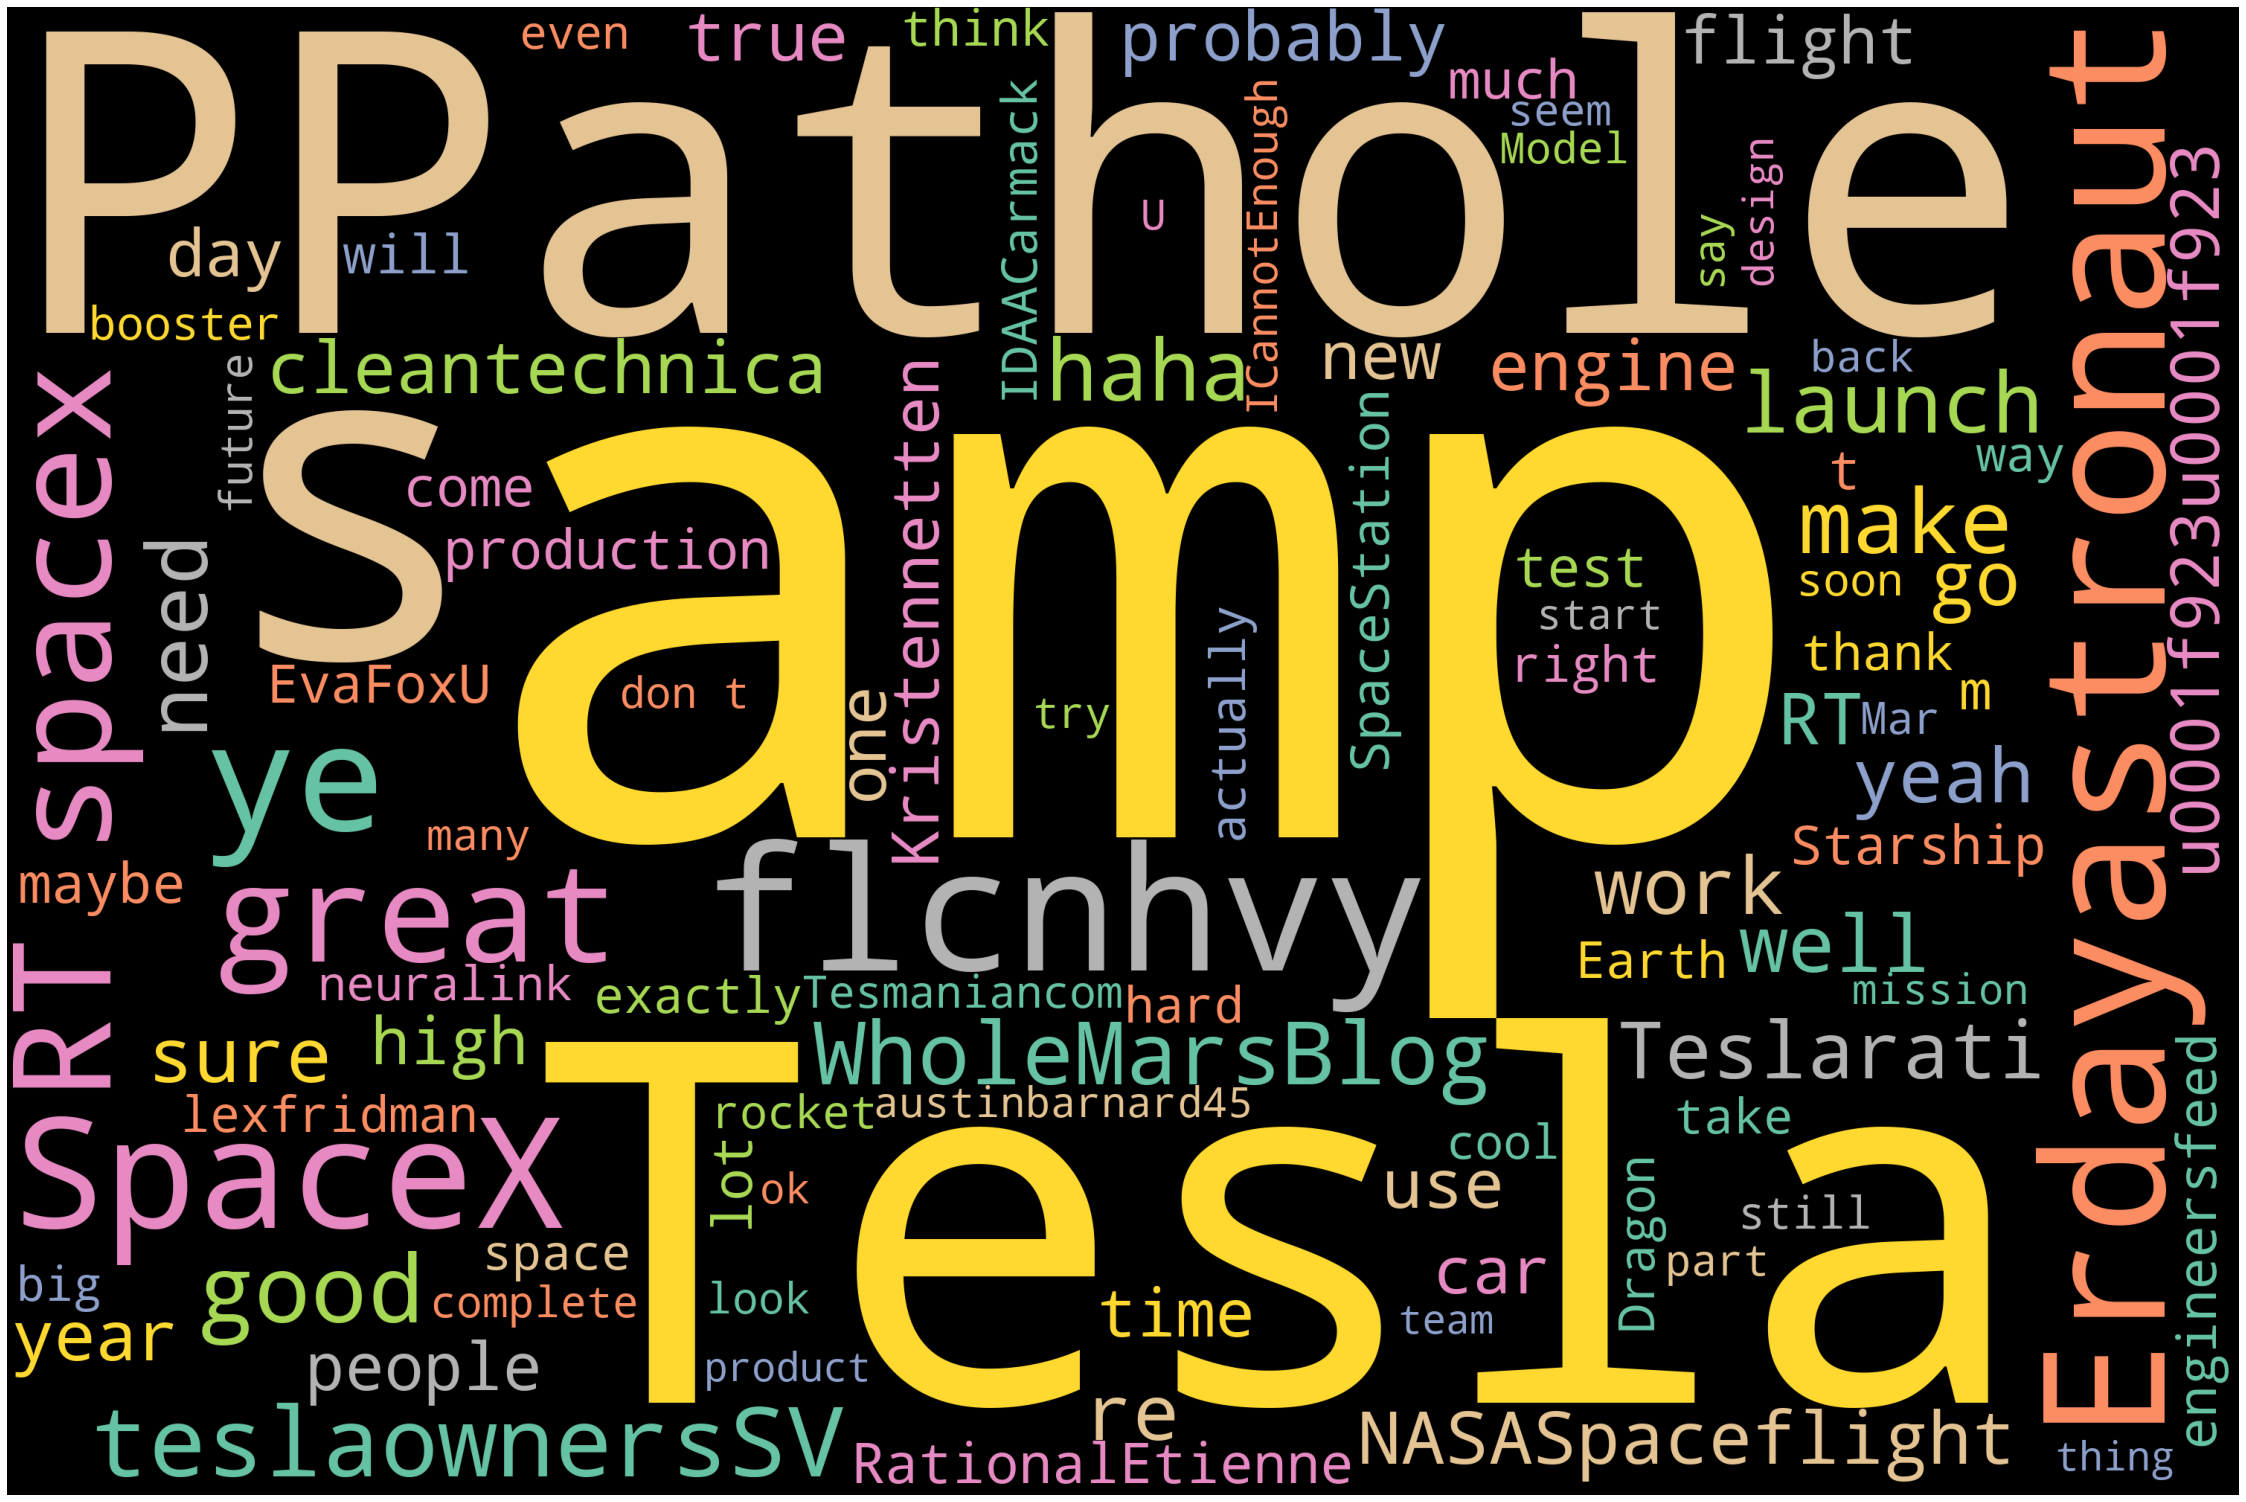

In [51]:
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black',max_words = 100, colormap = 'Set2',stopwords = stopwords).generate(text1)
plot(wordcloud)

In [52]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [59]:
##Part Of Speech Tagging

nlp = spacy.load('en_core_web_sm')

one_block = tweets[15]
sec_block = tweets[5]
block = one_block.join(sec_block)
doc_block = nlp(block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [33]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[0:100])

['has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', '@JoshManMode', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems', 'bit', 'has', 'issues', 'sentencing', 'seems']


In [34]:
## Counting tokens again
cv = CountVectorizer()
x = cv.fit_transform(nouns_verbs)
sum_words = x.sum(axis = 0)
words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]

In [60]:
words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word','count']
wf_df[0:10]

,word,count
0,has,139
1,issues,139
2,sentencing,139
3,seems,139
4,bit,139
5,joshmanmode,22
6,higho,4
7,highz,1


<AxesSubplot:title={'center':'Top'}, xlabel='word'>

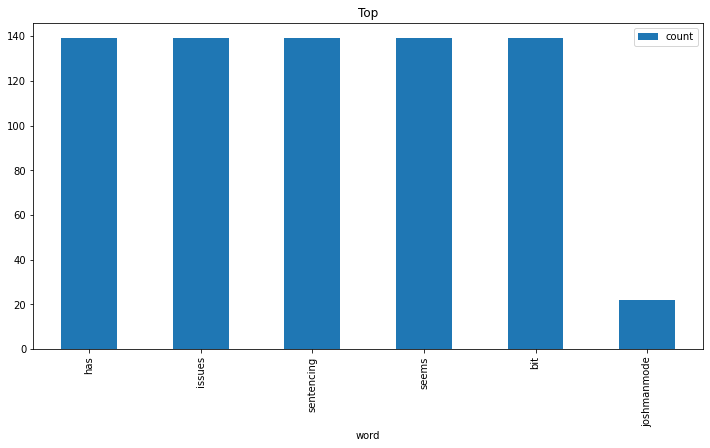

In [61]:
## Visualizing results

wf_df[0:6].plot.bar(x = 'word', figsize = (12,6), title = 'Top')